Graph visible only between 5 PM and 7 PM IST


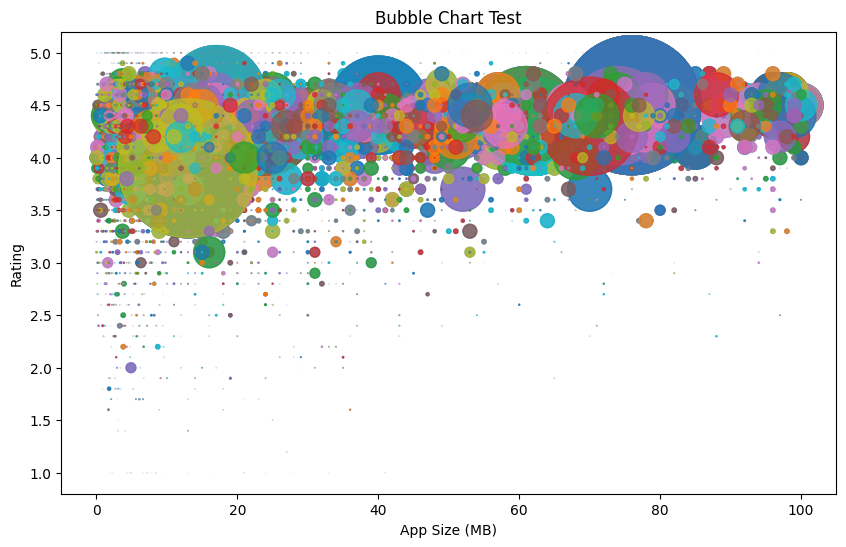

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz

df = pd.read_csv("Play Store Data.csv")

# Clean columns
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

def convert_size(size):
    if 'M' in str(size):
        return float(size.replace('M',''))
    elif 'k' in str(size):
        return float(size.replace('k','')) / 1024
    else:
        return None

df['Size_MB'] = df['Size'].apply(convert_size)

# Drop empty rows
df = df.dropna(subset=['Size_MB','Rating','Installs'])


# ---- BASIC BUBBLE CHART ----
plt.figure(figsize=(10,6))

plt.scatter(
    df['Size_MB'],
    df['Rating'],
    s=df['Installs'] / 100000,   # big visible bubbles
    alpha=0.6
)

plt.xlabel("App Size (MB)")
plt.ylabel("Rating")
plt.title("Bubble Chart Test")

# ----- TIME FILTER (5 PM to 7 PM IST) -----
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist).time()

start_time = datetime.time(17, 0)   # 5 PM
end_time = datetime.time(19, 0)     # 7 PM

if not (start_time <= current_time <= end_time):
    print("Graph visible only between 5 PM and 7 PM IST")
    exit()

# ----- COLORFUL BUBBLES -----
colors = np.random.rand(len(df))

plt.scatter(
    df['Size_MB'],
    df['Rating'],
    s=df['Installs'] / 100000,
    c=colors,
    cmap='tab10',
    alpha=0.7
)


plt.show()